In [1]:
import sys
import matplotlib.pyplot as plt
#%matplotlib notebook
sys.path.append('..')
#
from ttlab import XPS, XPSFunctions, X0Functions

# Find the carbon peak and shift it to 284.8 eV

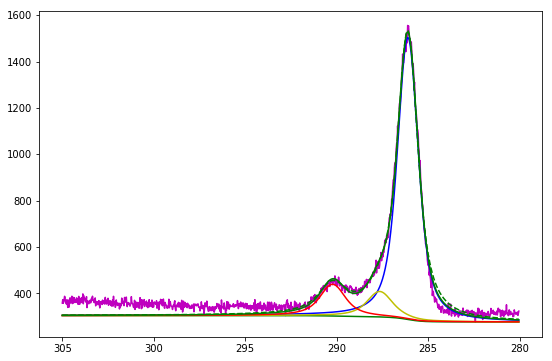

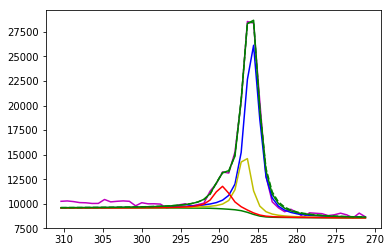

In [2]:
fig = plt.figure(figsize=(9,6))
filename_survey = 'mock_data/xps_survey_1.asc'
filename_multi = 'mock_data/xps_multi_1.asc'
xps = XPS(filename_multi=filename_multi, filename_survey=filename_survey)
xps.shift_multi(show_fit=True)
xps.shift_survey(show_fit=True)
xps.plotly_all()

# Fit a single gauss-lorents function to a peak and finds the position of it

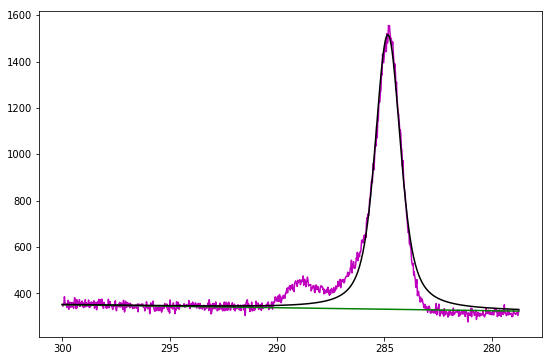

In [3]:
fig = plt.figure(figsize=(9,6))
filename_survey = 'mock_data/xps_survey_1.asc'
filename_multi = 'mock_data/xps_multi_1.asc'
xps = XPS(filename_multi=filename_multi, filename_survey=filename_survey)
xps.shift_multi()
xps.shift_survey()

energy_multi = xps.get_energy_multi('C1s')
counts_multi = xps.get_counts_multi('C1s')

peakposition, error = XPSFunctions.find_peak(energy_multi,counts_multi,background_model='linear',range=[0,300],show_fit=True)


# Find the Pd3d peak

In [ ]:
fig = plt.figure(figsize=(9,6))
filename_survey = 'mock_data/PdAl2O3Au-12cycles_survey.asc'
filename_multi = 'mock_data/PdAl2O3Au-12cycles_multi.asc'
xps = XPS(filename_multi=filename_multi, filename_survey=filename_survey)
xps.shift_multi()
xps.shift_survey()
xps.plotly_all()

energy_multi = xps.get_energy_multi('Pd3d')
counts_multi = xps.get_counts_multi('Pd3d')

peakposition, error = XPSFunctions.find_peak(energy_multi,counts_multi,background_model='shirley',range=[0,500],show_fit=True,orbital='Pd3d')

plt.show()

# Find the Pt4f peak

[1.10622411e+04 7.19186140e+01 1.93212722e-01 1.22160115e+00
 1.97932678e+03 7.52275505e+01 1.61691341e+00 9.04347263e-05]
[11062.241145370968, 71.9186140205199, 0.1932127220486543, 1.221601153123136, 3318.67234361129, 73.3186140205199, 0.1932127220486543, 1.221601153123136, 3318.67234361129, 74.8186140205199, 0.1932127220486543, 1.221601153123136, 1979.3267772987206, 75.22755049557266, 1.6169134062387636, 9.043472626352197e-05, 593.7980331896161, 76.62755049557266, 1.6169134062387636, 9.043472626352197e-05, 593.7980331896161, 78.12755049557266, 1.6169134062387636, 9.043472626352197e-05]


<Figure size 648x432 with 0 Axes>

<Figure size 648x432 with 0 Axes>

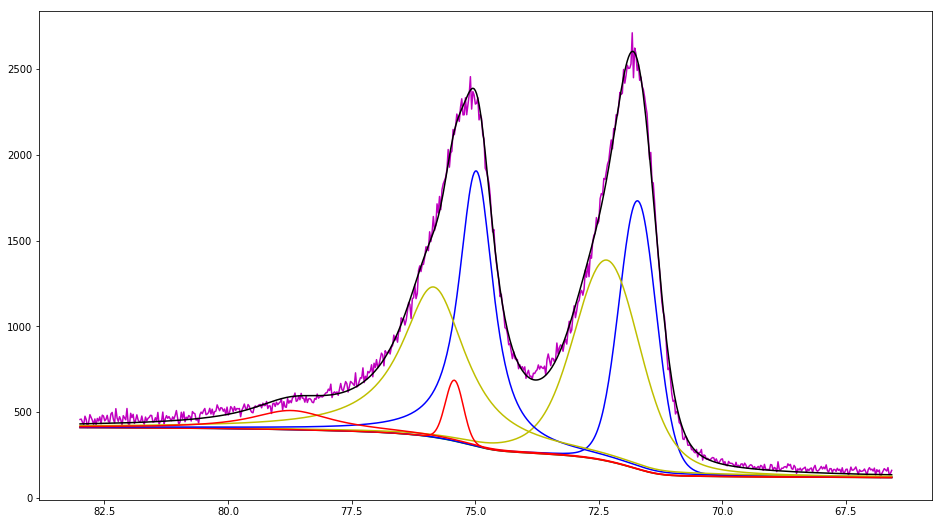

In [5]:
fig = plt.figure(figsize=(9,6))
filename_multi = 'mock_data/Pt_8_Al2O3_Au.asc'
xps = XPS(filename_multi=filename_multi, filename_survey=filename_survey)
xps.shift_multi()
xps.plotly_all()

energy_multi = xps.get_energy_multi('Pt4f')
counts_multi = xps.get_counts_multi('Pt4f')

index = X0Functions._find_index_of_nearest(energy_multi,83)

peakposition, error = XPSFunctions.find_peak(energy_multi[index::],counts_multi[index::],background_model='shirley',range=[0,500],show_fit=True,orbital='Pt4f')

plt.show()

In [ ]:
import numpy as np
from astropy.modeling.models import Voigt1D
import matplotlib.pyplot as plt
#342.719440045224, 2.69570885302484, 0.00030282795297215933, 98.54103250809189
#98.54103250809189, 342.719440045224, 2.69570885302484, 0.0003028279529721593

plt.figure(figsize=(9,6))
x = np.arange(330, 350, 0.01)
v1 = Voigt1D(x_0=342.719440045224, amplitude_L=98.54103250809189, fwhm_L=1.40656842, fwhm_G=-0.3028279529721593)
plt.plot(x, v1(x))
plt.show()